In [2]:
import os

import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz


In [3]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [4]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [5]:
# Transform COLLEGE column to a numeric variable
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1


In [6]:
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [7]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
#df = df.drop("LEAVE", axis="columns")
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2,LEAVE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1,1


In [8]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
COLLEGE2                        int32
LEAVE2                          int32
dtype: object

In [9]:
# Using variables INCOME, HOUSE, and COLLEGE2 as we did in our lab notebook
#predictor_cols = ["INCOME", "HOUSE","COLLEGE2"]
predictor_cols = ["INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","COLLEGE2"]

target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [10]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 8)
X_test shape: (5000, 8)
y_train shape: (15000,)
y_test shape: (5000,)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Let's define the model (tree)
decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
## Let's tell the model what is the data
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)
#scores = cross_val_score(decision_tree, df[predictor_cols],df[target_col], cv = 10)
#print(scores)

print("Cross validation scores: {}".format(scores))
print("Average cross validation score: {:.2f}".format(scores.mean()))
print("Std. dev of cross validation score: {:.2f}".format(scores.std()))
print("Minimum of cross validation score: {:.2f}".format(scores.min()))

y_pred = decision_tree.predict(X_test)
print("Test set score: {: 2f}".format(np.mean(y_pred == y_test)))

Cross validation scores: [0.68333333 0.70333333 0.70333333 0.686      0.70733333 0.704
 0.7        0.69533333 0.72066667 0.71133333]
Average cross validation score: 0.70
Std. dev of cross validation score: 0.01
Minimum of cross validation score: 0.68
Test set score:  0.699200


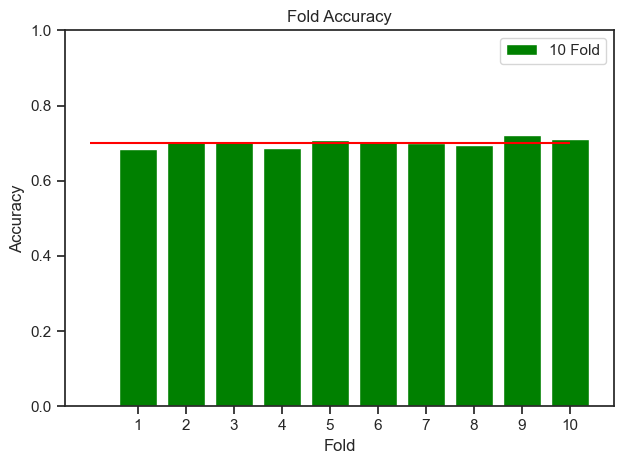

In [12]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 11, 1)

 
plt.bar(parameter_range, scores,
         label="10 Fold", color='g')

plt.plot(scores.mean())
plt.hlines(scores.mean(),xmin=0,xmax=10,colors="red")

# Creating the plot
plt.title("Fold Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.legend(loc='best')
plt.xticks(ticks=parameter_range)
plt.show()

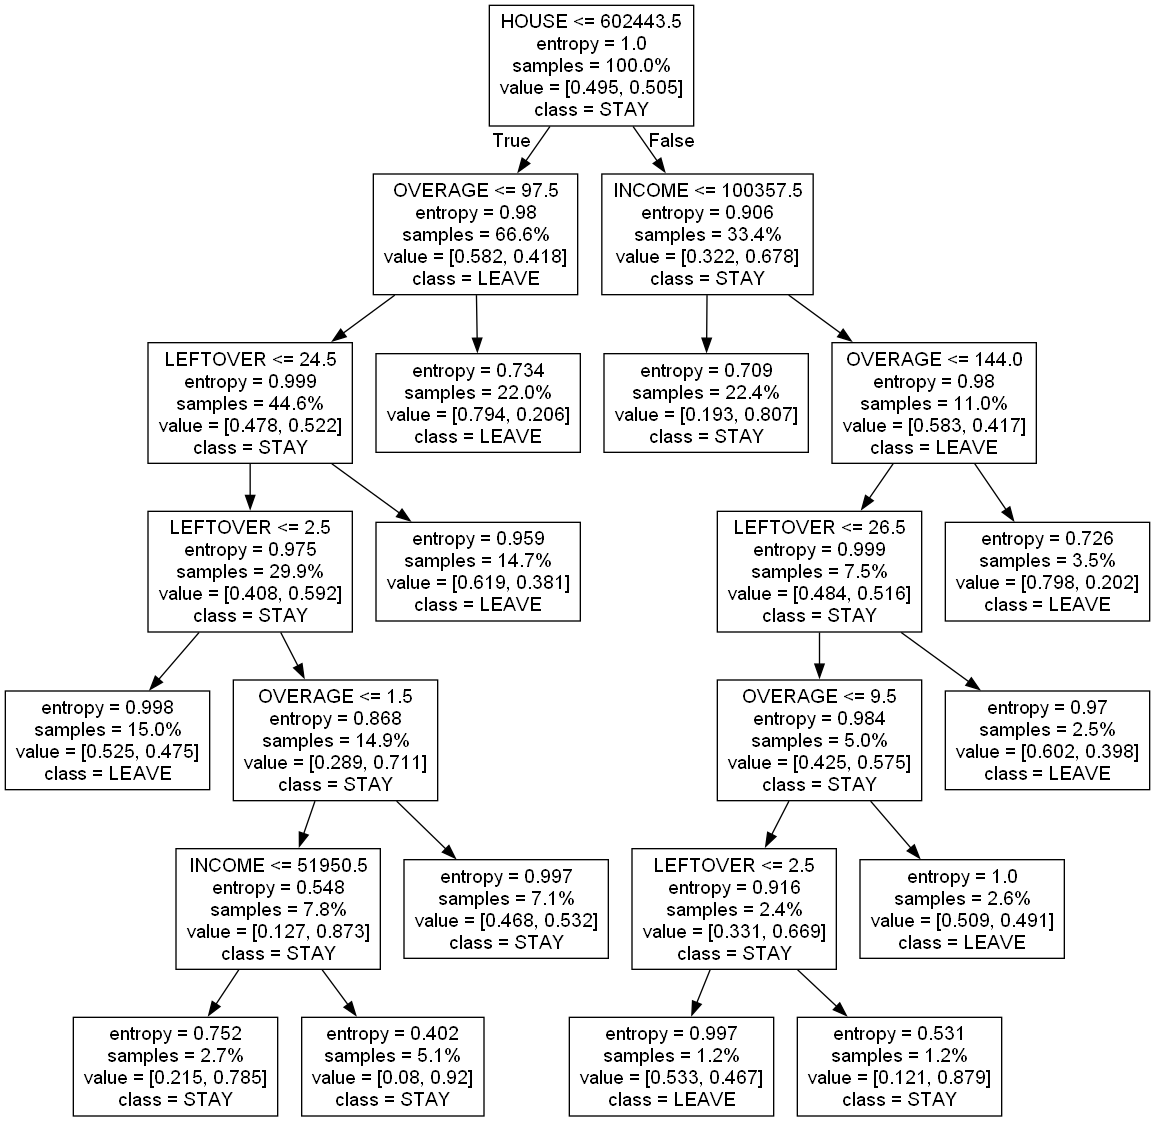

In [13]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from graphviz import Source

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    directory1 = directory[2:]
    os.system("mkdir %s" %(directory1))
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,feature_names=feature_names,class_names=class_names,
                               proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s  -o %s" % (dot_name, image_name))
    
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["LEAVE", "STAY"])


Confusion matrix, without normalization
[[1986  438]
 [1066 1510]]
Normalized confusion matrix
[[0.82 0.18]
 [0.41 0.59]]


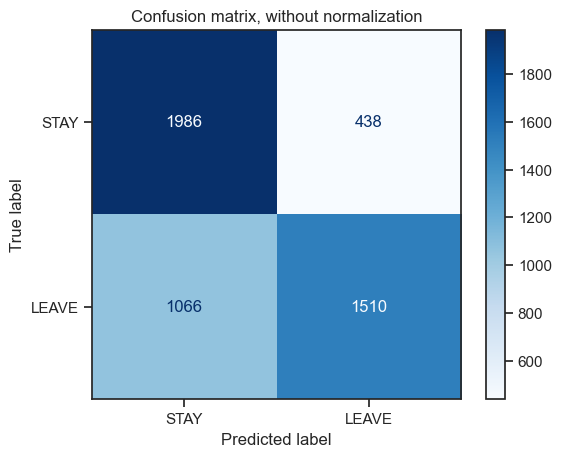

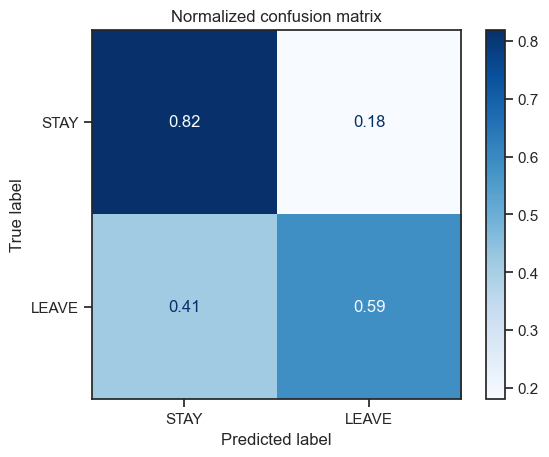

              precision    recall  f1-score   support

        STAY       0.65      0.82      0.73      2424
       LEAVE       0.78      0.59      0.67      2576

    accuracy                           0.70      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.71      0.70      0.70      5000



In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
import numpy as np

classifier = decision_tree

#decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
## Let's tell the model what is the data
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=["STAY","LEAVE"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


print(classification_report(y_test, y_pred, target_names=["STAY","LEAVE"]))



[0.   0.18 1.  ]
[0.   0.59 1.  ]
[inf  1.  0.]


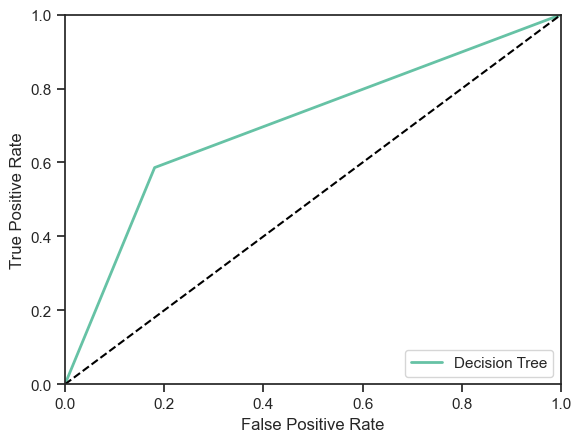

ROC AUC score: 0.7027435274583359


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)

########################################################################
###  I don't think this part is correct, but using confusion matrix and 
###  ROC/AUC is supposed to help figure out our cutoff point
########################################################################


plt.plot(fpr, tpr, linewidth=2,label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC score:', roc_auc)
